**Churn Modelling Prediction**

Churn prediction is the process of analyzing customer data to determine the likelihood that a customer will stop using a company's product or service. This can apply to various industries, including telecommunications, banking, subscription services, and more.

This dataset which is accessed from Kaggle has 10000 records to investigate and predict which of the customers are more likely to leave the bank soon.

We have implemented Arficial Neural Networks(ANN) as well as MultiLayer Perceptron(MLP) and analysed the accuracies.


In [70]:
#Loading the required libraries
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [67]:
#Loading the data and displaying the content
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [68]:
#Analysing the attributes
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

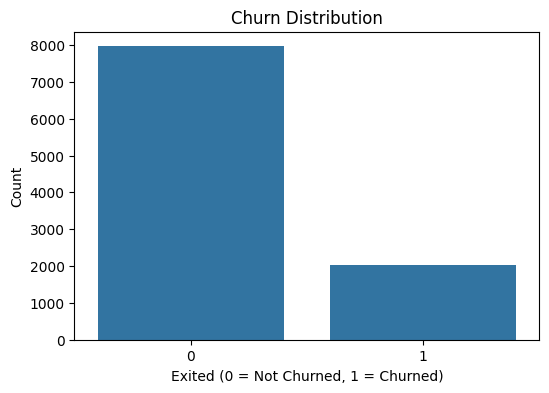

In [71]:
# Plotting the Churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Exited', data=df)
plt.title('Churn Distribution')
plt.xlabel('Exited (0 = Not Churned, 1 = Churned)')
plt.ylabel('Count')
plt.show()

In [73]:
#Selecting the categorical attributes alone to get encoded
categorical_cols = df.select_dtypes(include=['object'])
categorical_cols

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female
...,...,...,...
9995,Obijiaku,France,Male
9996,Johnstone,France,Male
9997,Liu,France,Female
9998,Sabbatini,Germany,Male


In [74]:
#Using LabelEncoder to encode
label_encoder = LabelEncoder()

In [75]:
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])


In [76]:
#Displaying data after encoding
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,0,43,2,125510.82,1,1,1,79084.10,0


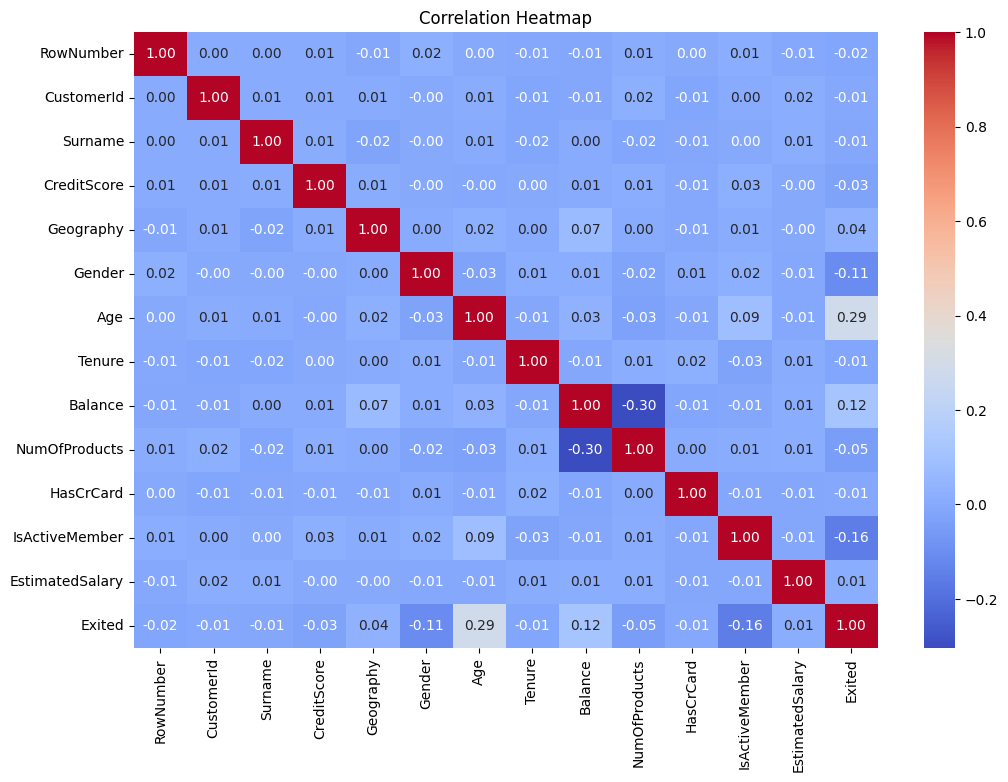

In [77]:
#Finding the correlation and visualising using heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [9]:
#Information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  int64  
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  int64  
 5   Gender           10000 non-null  int64  
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 1.1 MB


In [10]:
#Data description
df.describe()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,1507.774200,650.528800,0.746300,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,846.204311,96.653299,0.827529,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,0.000000,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,773.750000,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,1542.000000,652.000000,0.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,2238.250000,718.000000,1.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,2931.000000,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
#Checking for null values
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [12]:
#Inputs x and y
x = df.drop(columns=['Exited'])
y = df['Exited']

In [46]:
#Standardization of inputs
scaler = StandardScaler()
x = scaler.fit_transform(x)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [47]:
#Splitting train-test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [48]:
#Importing the libraries for ANN
from tensorflow import keras
from tensorflow.keras import layers

In [49]:
#Input features
x.shape

(10000, 13)

In [50]:
#Finding classes
num_labels=len(np.unique(y_train))
num_labels

2

In [51]:
#Defining ANN model
#Model contains Input layer, hidden layer and output layer
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(x_train.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [52]:
#Compilation of the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [79]:
#Model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                     │ (None, 32)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,981 (11.65 KB)

 Trainable params: 993 (3.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,988 (7.77 KB)

In [55]:
#Execution of the model
history=model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8784 - loss: 0.2974 - val_accuracy: 0.8400 - val_loss: 0.3611
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8772 - loss: 0.3007 - val_accuracy: 0.8431 - val_loss: 0.3635
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8798 - loss: 0.2856 - val_accuracy: 0.8394 - val_loss: 0.3683
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8836 - loss: 0.2873 - val_accuracy: 0.8413 - val_loss: 0.3649
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8709 - loss: 0.3036 - val_accuracy: 0.8375 - val_loss: 0.3607
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8844 - loss: 0.2850 - val_accuracy: 0.8363 - val_loss: 0.3679
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8850 - loss: 0.2836 - val_accuracy: 0.8375 - val_loss: 0.3642
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8834 - loss: 0.2896 - val_accuracy: 0.

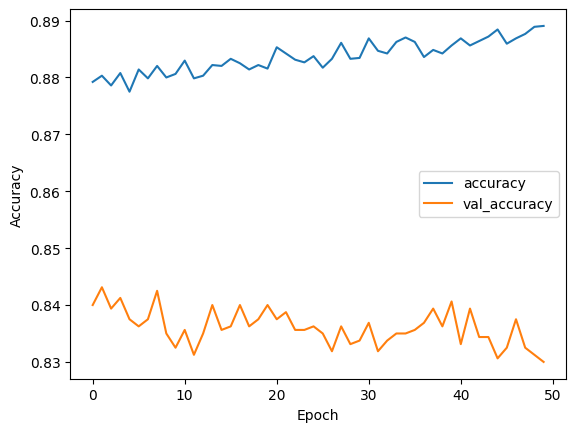

In [56]:
#Visualising the model Accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

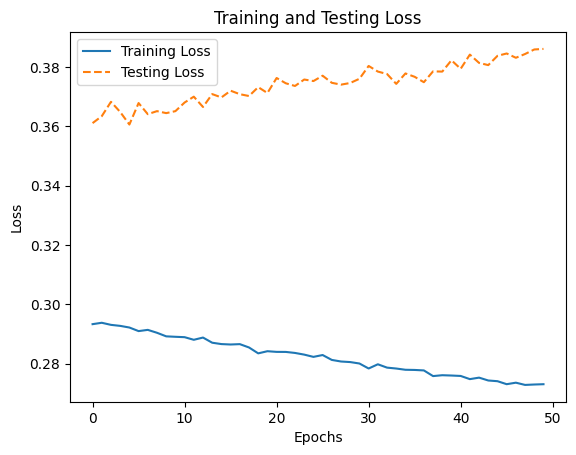

In [78]:
#Model loss Visualisation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss', linestyle='--')
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [57]:
y_pred=model.predict(x_test)
y_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[0.03223386],
       [0.0098585 ],
       [0.09222329],
       ...,
       [0.8031892 ],
       [0.05905572],
       [0.6231543 ]], dtype=float32)

In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

In [60]:
#Converting the predictions into integer
y_pred=y_pred.astype(int)

In [61]:
#Confusion matrix
print(confusion_matrix(y_test, y_pred))

[[1607    0]
 [ 390    3]]


In [62]:
#Precision and Recall
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       1.00      0.01      0.02       393

    accuracy                           0.81      2000
   macro avg       0.90      0.50      0.45      2000
weighted avg       0.84      0.81      0.72      2000



In [63]:
#Using MLP Classifier and comparing the accuracy
from sklearn.neural_network import MLPClassifier

In [66]:
#Defining model using MLPClassifier and finding accuracy
model1=MLPClassifier()
model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)
accuracy_score(y_test,y_pred)

0.858

Result:

As per the results, the model has the highest accuracy for ANN when compared to MLP.